<a href="https://colab.research.google.com/github/VigneshR14/OIBSIP/blob/main/Datascience_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unemployment Analysis for Data Science intern Task By Vignesh R

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
data = pd.read_csv('unemplaymentinindia.csv')

In [7]:
data = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [8]:
data


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [9]:
#updating the column names
data.columns=["State","Date","Frequency","Estimated unemployment rate","Estimated employed","Estimated labour participation rate","Region","Longitude","Latitude"]

In [10]:
data.tail()

,State,Date,Frequency,Estimated unemployment rate,Estimated employed,Estimated labour participation rate,Region,Longitude,Latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [11]:
data.shape

(267, 9)

In [12]:
data.columns

Index(['State', 'Date', 'Frequency', 'Estimated unemployment rate',
       'Estimated employed', 'Estimated labour participation rate', 'Region',
       'Longitude', 'Latitude'],
      dtype='object')

In [13]:
data.describe()


,Estimated unemployment rate,Estimated employed,Estimated labour participation rate,Longitude,Latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [14]:
data.isnull().sum()

State                                  0
Date                                   0
Frequency                              0
Estimated unemployment rate            0
Estimated employed                     0
Estimated labour participation rate    0
Region                                 0
Longitude                              0
Latitude                               0
dtype: int64

In [15]:
data.duplicated().any()

False

In [16]:
data.State.value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: State, dtype: int64

In [17]:
# Converting "Date" column to Datetime format
data['Date']= pd.to_datetime(data['Date'],dayfirst=True)

#Converting 'Frequency' and 'Region' columns to categorical data type
data['Frequency'] = data['Frequency'].astype('category')
data['Region'] = data['Region'].astype('category')

In [18]:
data

,State,Date,Frequency,Estimated unemployment rate,Estimated employed,Estimated labour participation rate,Region,Longitude,Latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,22.9868,87.855


Extracting Month From Date attribute

In [19]:
data['Month']= data['Date'].dt.month

In [20]:
#converting 'month' to integer format
data['Month_int'] = data['Month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names
data['Month_name'] = data['Month_int'].apply(lambda x: calendar.month_abbr[x])


In [21]:
#Dropping the original 'Month' column
data.drop(columns='Month', inplace=True)

In [22]:
data['Month'] = data['Month_int'].apply(lambda x: calendar.month_abbr[x])

In [23]:
data.tail()


,State,Date,Frequency,Estimated unemployment rate,Estimated employed,Estimated labour participation rate,Region,Longitude,Latitude,Month_int,Month_name,Month
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855,6,Jun,Jun
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855,7,Jul,Jul
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855,8,Aug,Aug
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,22.9868,87.855,9,Sep,Sep
266,West Bengal,2020-10-31,M,9.98,33962549,45.63,East,22.9868,87.855,10,Oct,Oct


Exploratory Data Analysis


In [24]:
#Basic Statistics
data_stats = data[['Estimated unemployment rate', 'Estimated employed', 'Estimated labour participation rate']]
round(data_stats.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Estimated unemployment rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated labour participation rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [29]:
region_stats = data.groupby(['Region'])[['Estimated unemployment rate', 'Estimated employed',
                                       'Estimated labour participation rate']].mean().reset_index()
round(region_stats, 2)

,Region,Estimated unemployment rate,Estimated employed,Estimated labour participation rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


Data Visualization
Bar plot of Unemployment rate and Labour participation rate

In [30]:
IMD = data.groupby(["Month"])[['Estimated unemployment rate','Estimated employed','Estimated labour participation rate']].mean()
IMD = pd.DataFrame(IMD).reset_index()

In [31]:
month = IMD.Month
unemployment_rate = IMD["Estimated unemployment rate"]
labour_participation_rate = IMD["Estimated labour participation rate"]

fig = go.Figure()

fig.add_trace(go.Bar(x=month, y= unemployment_rate, name = "Unemployment Rate"))
fig.add_trace(go.Bar(x= month , y = labour_participation_rate, name = "Labourparticipation Rate"))

fig.update_layout(title = "Unemploymnet Rate and Labour Participation rate ",
                 xaxis= {"categoryorder":"array","categoryarray":["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]})

fig.show()


Bar plot of estimated employed citizen in every month

In [32]:
import plotly.express as px


In [33]:
fig = px.bar(IMD, x='Month', y='Estimated employed', color='Month',
            category_orders = {"Month":["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]},
            title = 'Estimated employed people from Jan 2020 to Oct 2020')

fig.show()


Average Unemployment rate shown in bar plot


In [36]:
fig = px.bar(State, x='State', y='Estimated unemployment rate', color="State",title="Average Unemployment Rate (State)")
fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()

*Haryana and Tripura was having the highest average amount of Unemployment Rate.


*Meghalaya was having the lowest average amount of Unemployment Rate


State Analysis


In [34]:
State = data.groupby("State")[['Estimated unemployment rate','Estimated employed','Estimated labour participation rate']].mean()
State = pd.DataFrame(State).reset_index()

In [35]:
#box Plot

fig = px.box(data,x='State',y='Estimated unemployment rate',color='State',title='Unemployment rate')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Correlation Heatmap

<Axes: >

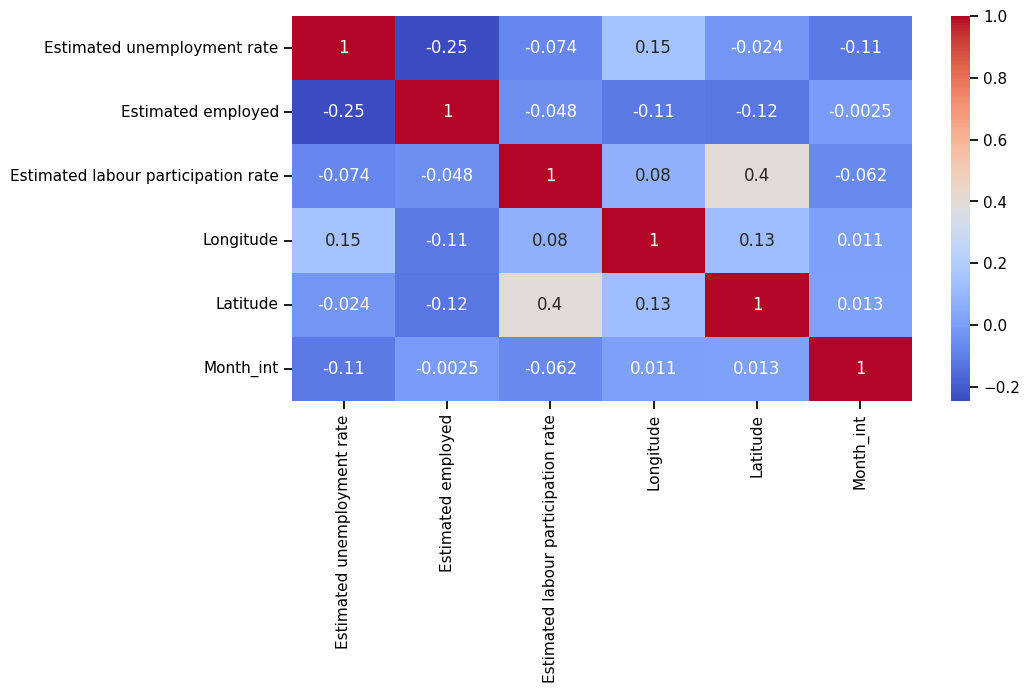

In [37]:
heat_maps = data[["Estimated unemployment rate", "Estimated employed","Estimated labour participation rate",'Longitude','Latitude','Month_int']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(10,5))
sns.set_context("notebook",font_scale=1)
sns.heatmap(heat_maps,annot=True , cmap='coolwarm')

Scatter Matrix


In [38]:
fig = px.scatter_matrix(data, template='plotly',
                        dimensions=['Estimated unemployment rate', 'Estimated employed', 'Estimated labour participation rate'],
                        color='Region')
fig.show()

Sunburst chart

In [40]:
# Sunburst chart showing unemployment rate in each region and state

unemplo_df = data[['State', 'Region', 'Estimated unemployment rate', 'Estimated employed', 'Estimated labour participation rate']]
unemplo = unemplo_df.groupby(['Region', 'State'])['Estimated unemployment rate'].mean().reset_index()
fig = px.sunburst(unemplo, path=['Region', 'State'], values='Estimated unemployment rate',
                  color_continuous_scale='Plasma', title='Unemployment rate in each region and state',
                  height=650, template='ggplot2')
fig.show()


Animated bar plot of Unemployment rate across region from Jan.2020 to Oct.2020


In [39]:
fig = px.bar(data, x='Region', y='Estimated unemployment rate', animation_frame='Month_name', color='State',
             title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700, template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()


Monthly unemployment rate

In [41]:
#Impact of Lockdown on States Estimated Employed

fig = px.scatter_geo(data,'Longitude', 'Latitude', color="Region",
                     hover_name="State", size="Estimated unemployment rate",
                     animation_frame="Month_name",scope='asia',template='seaborn',title='Impack of lockdown on Employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="lightblue",
    showocean=True)

fig.show()


Regional Analysis


In [42]:
data.Region.unique()


['South', 'Northeast', 'East', 'West', 'North']
Categories (5, object): ['East', 'North', 'Northeast', 'South', 'West']

Unemployment rate before and after Lockdown

In [43]:
#data representation before and after the lockdown

before_lockdown = data[(data['Month_int']>=1) & (data['Month_int']<4)]
after_lockdown =  data[(data['Month_int']>=4) & (data['Month_int']<=6)]

In [44]:
af_lockdown=after_lockdown.groupby('State')['Estimated unemployment rate'].mean().reset_index()
lockdown= before_lockdown.groupby('State')['Estimated unemployment rate'].mean().reset_index()
lockdown['Unemployment Rate before lockdown'] = af_lockdown['Estimated unemployment rate']

lockdown.columns=['State','Unemployment Rate Before Lockdown','Unemployment Rate After Lockdown']

lockdown.head()

,State,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,Andhra Pradesh,5.700000,13.750000
1,Assam,4.613333,7.070000
2,Bihar,12.110000,36.806667
3,Chhattisgarh,8.523333,9.380000
4,Delhi,18.036667,25.713333


In [45]:
# percentage change in unemployment rate

lockdown['rate change in unemployment'] = round(lockdown['Unemployment Rate After Lockdown'] -lockdown['Unemployment Rate Before Lockdown']/lockdown['Unemployment Rate Before Lockdown'],2)
plot_per = lockdown.sort_values('rate change in unemployment')

In [46]:
# percentage change in unemployment after lockdown

fig = px.bar(plot_per, x='State',y='rate change in unemployment',color='State',
            title='percentage change in Unemployment in each state after lockdown',template='ggplot2')
fig.show()

Most impacted States/Union Territories



1.Puducherry

2.Jharkhand

3.Bihar

4.Haryana

5.Tripura


Impact of lockdown on employment across states¶

In [47]:
# function to sort value based on impact

def sort_impact(x):
    if x <= 10:
        return 'impacted States'
    elif x <= 20:
        return 'hard impacted States'
    elif x <= 30:
        return 'harder impacted States'
    elif x <= 46:
        return 'hardest impacted States'
    return x

In [48]:
plot_per['impact status'] = plot_per['rate change in unemployment'].apply(lambda x:sort_impact(x))

In [50]:
fig = px.bar(plot_per, y='State',x='rate change in unemployment',color='impact status',
            title='Impact of lockdown on employment across states and union territories',template='ggplot2',height=650)


fig.show()